In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
import statsmodels.api as sm
import scipy.stats as ss

/Users/weishunji/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Read data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
# data summary
train.describe()
train.shape, test.shape
train.head()

In [ ]:
# missing value
train.isnull().sum()
# no missing values

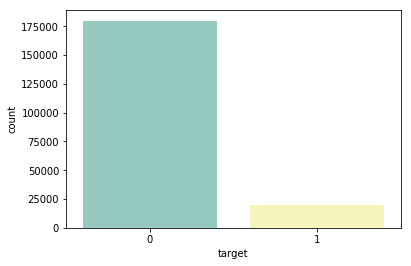

In [5]:
# Distribution of Target
sns.countplot(train['target'], palette='Set3')

In [8]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

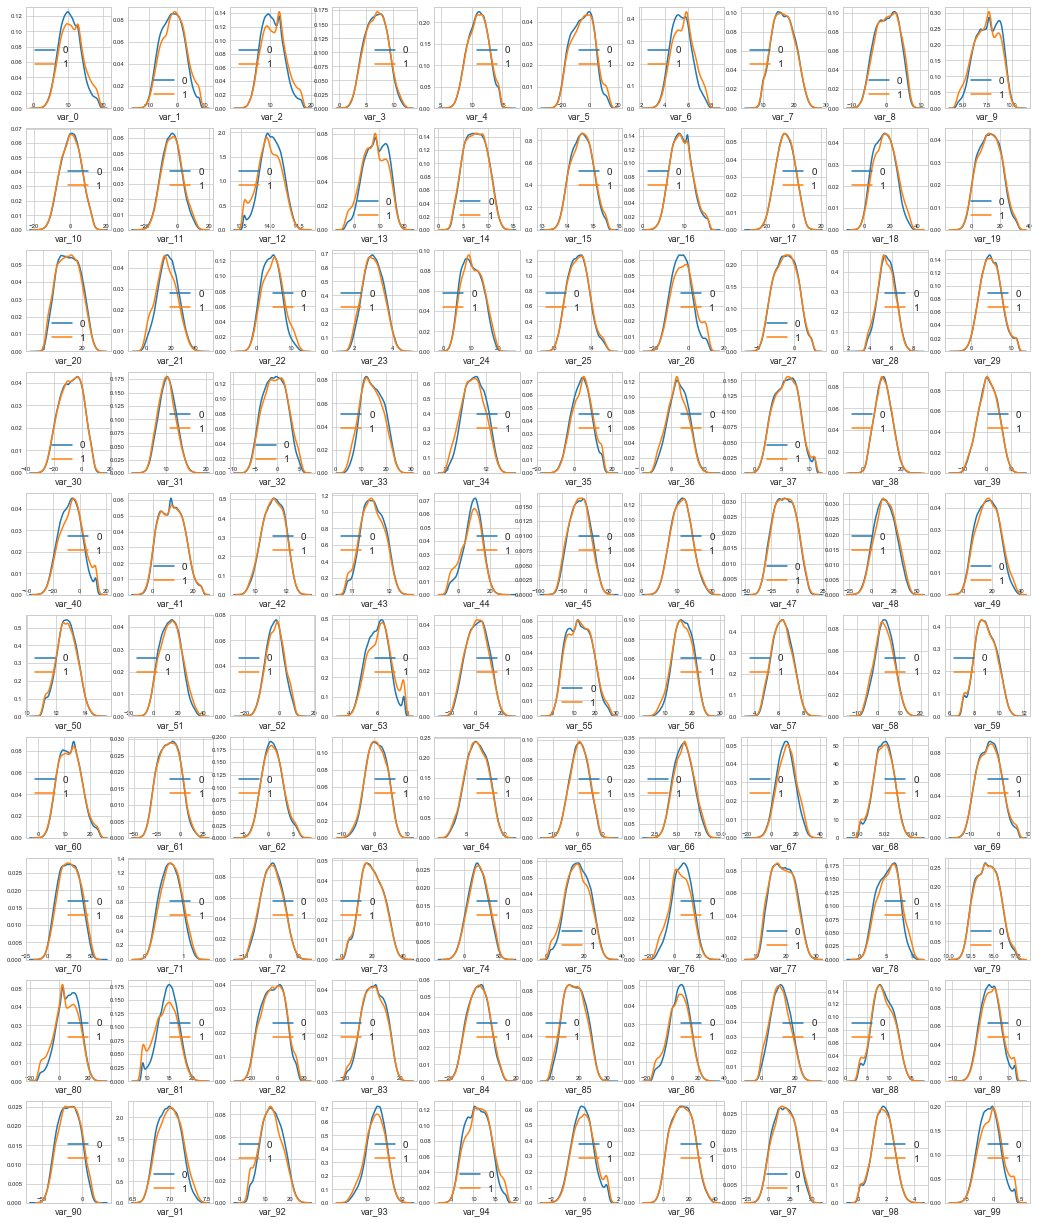

In [10]:
# Density plot
t0 = train.loc[train['target'] == 0];
t1 = train.loc[train['target'] == 1];
features = train.columns.values[2:102];
plot_feature_distribution(t0, t1,'0','1',features)

In [ ]:
features = train.columns.values[22:202];
plot_feature_distribution(t0, t1,'0','1',features)

In [16]:
# Statistically detect whether the variables are significantly useful for classifying the target variable

# Logistic regression
logit_model = sm.GLM(train['target'], sm.add_constant(pd.DataFrame(train['var_183'])), 
                    family = sm.families.Binomial()).fit()
logit_model.summary()

# T-test
x1 = train[train['target']==1]['var_0']
x2 = train[train['target']==0]['var_0']
ss.ttest_ind(x1, x2)

Ttest_indResult(statistic=0.023754013811011856, pvalue=0.9810488450484025)